In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
#loading dataset
data = pd.read_excel(r'/content/iris.xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.head(5)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info

<bound method DataFrame.info of       SL   SW   PL   PW  Classification
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    NaN  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  NaN  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]>

In [5]:
data.shape

(150, 5)

In [6]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [7]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#missing values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [9]:
#dropping the null values
data['SL'].fillna(data['SL'].mode().values[0],inplace=True)
data['SW'].fillna(data['SW'].mode().values[0],inplace=True)
data['PL'].fillna(data['PL'].mode().values[0],inplace=True)

In [10]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [11]:
#data splitting
X= data.drop('Classification', axis=1)
y= data.Classification
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#**Model Creation using 5 Classifiers:-**

# **1.** LOGISTIC REGRESSION

In [12]:
lr= LogisticRegression()
model= lr.fit(X_train,y_train)
y_pred= model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9736842105263158

In [13]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 1, 10,  0],
       [ 0,  0, 12]])

#**2.** KNN

In [14]:
metric_k=[]
neighbors= np.arange(3,15)
for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train,y_train)
    y_pred= classifier.predict(X_test)
    acc= accuracy_score(y_test,y_pred)
    metric_k.append(acc)

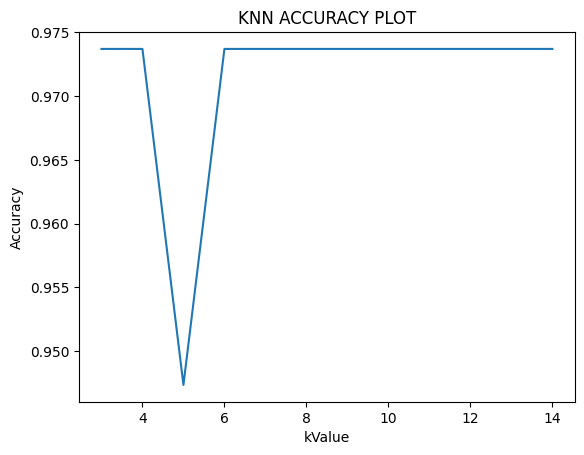

In [15]:
plt.plot(neighbors, metric_k)
plt.title('KNN ACCURACY PLOT')
plt.xlabel('kValue')
plt.ylabel('Accuracy')
plt.show()

In [16]:
classifier= KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)

In [17]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [18]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 1, 10,  0],
       [ 0,  0, 12]])

# **3.**SVM

In [19]:
svc=SVC(kernel="poly",random_state=45)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
accuracy_score(y_test,y_pred)

0.9736842105263158

In [20]:
svc=SVC(kernel="rbf",random_state=42)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
accuracy_score(y_test,y_pred)

0.9736842105263158

In [21]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 1, 10,  0],
       [ 0,  0, 12]])

# **4.** DECISION TREE CLASSIFIER

In [22]:
DT = DecisionTreeClassifier(random_state=12)
DT = DT.fit(X_train, y_train)
y_pred=DT.predict(X_test)

In [23]:
accuracy_score(y_test,y_pred)

1.0

In [24]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

#**5.** RANDOM FOREST

In [25]:
clf = RandomForestClassifier()
clf= clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

#**PAIRPLOT Visualization**

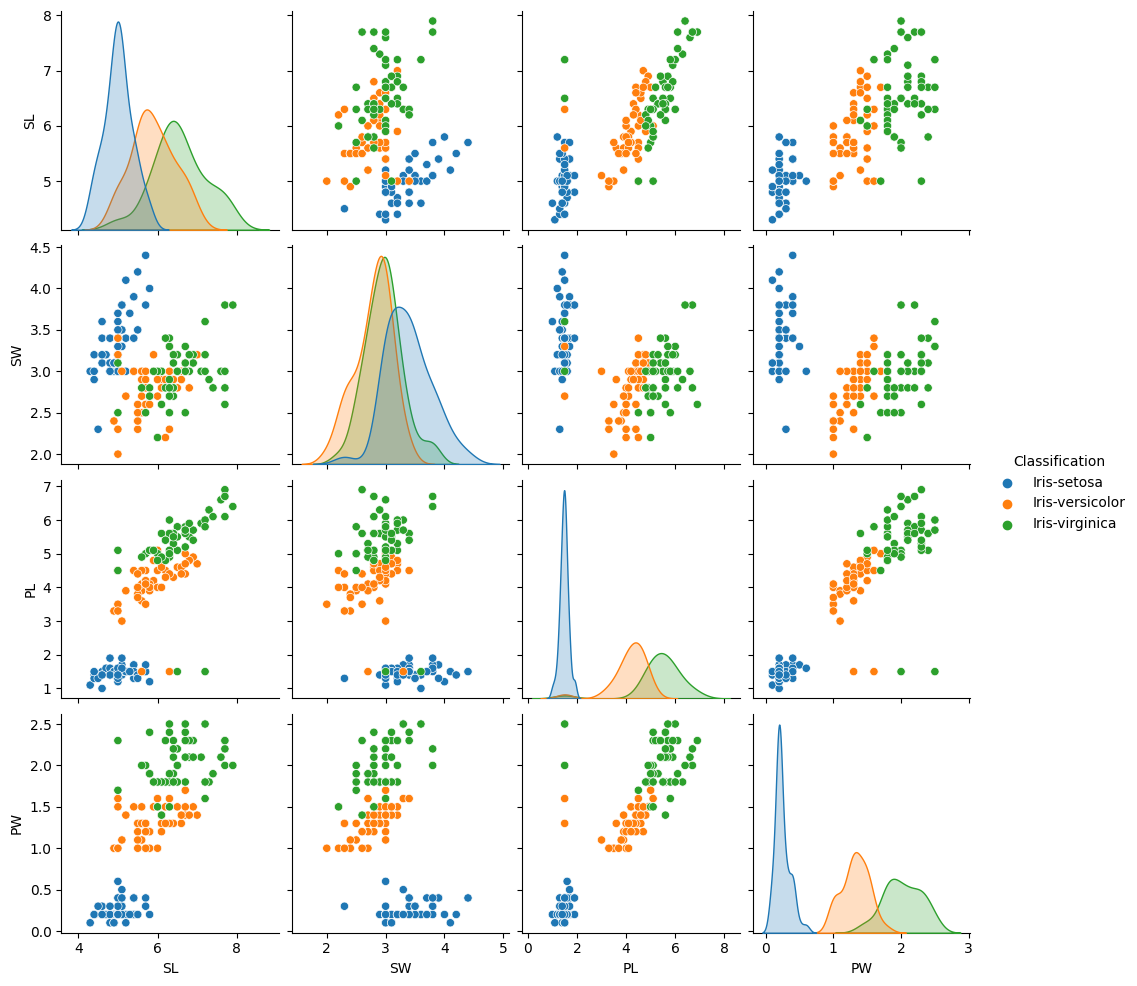

In [26]:
sns.pairplot(data, hue='Classification')
plt.show()